In [306]:
#Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']= (12,8) 


In [307]:
#Dataset = https://www.kaggle.com/datasets/danielgrijalvas/movies
df = pd.read_csv(r"D:\Data\archive\movies.csv")
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [308]:
#Find missing values
for col in df.columns:
    precentage_missng  = np.mean(df[col].isnull())
    print('{}-{}%'.format(col,round(precentage_missng*100)))

name-0%
rating-1%
genre-0%
year-0%
released-0%
score-0%
votes-0%
director-0%
writer-0%
star-0%
country-0%
budget-28%
gross-2%
company-0%
runtime-0%


In [309]:
df.isnull().any()

name        False
rating       True
genre       False
year        False
released     True
score        True
votes        True
director    False
writer       True
star         True
country      True
budget       True
gross        True
company      True
runtime      True
dtype: bool

In [310]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [311]:
#Data_Types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [312]:
#fill Null values in budget, gross with 0
df['budget'] = df['budget'].fillna(value = 0)
df['gross'] = df['gross'].fillna(value = 0)
df.isnull().sum()

name         0
rating      77
genre        0
year         0
released     2
score        3
votes        3
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      4
dtype: int64

In [313]:
#drop columns with null value for released year
df = df[df['released'].notnull()]
df.isnull().sum()

name         0
rating      77
genre        0
year         0
released     0
score        3
votes        3
director     0
writer       3
star         1
country      1
budget       0
gross        0
company     15
runtime      2
dtype: int64

In [314]:
#change the type of budget and gross columns to int
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [315]:
#1980	June 19, 1981 (United States) Release date is not aligned with the year column. 
#adding a new column and extract the year from released information to get the correct release year)
df['released_year'] = df['released'].str.split("(")
df['released_year'] = df['released'].str.extract(r'(\d{4})', expand=False)


In [316]:
df['released_year']

0       1980
1       1980
2       1980
3       1980
4       1980
        ... 
7663    2020
7664    2020
7665    2020
7666    2020
7667    2020
Name: released_year, Length: 7666, dtype: object

In [317]:
df.head(10)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,2020


In [318]:
#identify the duplicates, here the method is to identify all the columns and check whether there is any duplicate values 
duplicates = df[df.duplicated]
print(duplicates)

Empty DataFrame
Columns: [name, rating, genre, year, released, score, votes, director, writer, star, country, budget, gross, company, runtime, released_year]
Index: []


In [319]:
#remove duplicates if there is any and keep the first 
df = df.drop_duplicates(keep='first')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,2020


In [320]:
#Get the Movie Names and sort by budget
movies_b = df.groupby(['name']).agg({'budget':'sum','gross':'sum'})
sort_by_highest_budget = movies_b.sort_values(by = 'budget', ascending = False)
sort_by_highest_budget

,budget,gross
name,,
Avengers: Endgame,356000000,2797501328
Avengers: Infinity War,321000000,2048359754
Star Wars: Episode VIII - The Last Jedi,317000000,1332698830
The Lion King,305000000,2754448457
Justice League,300000000,657926987
...,...,...
Big Top Pee-wee,0,15122324
Big Stone Gap,0,1012804
Rachel Getting Married,0,16937968


In [321]:
#Get the Movie Names and sort by gross revenue
movies_g = df.groupby(['name']).agg({'budget':'sum','gross':'sum'})
sort_by_highest_gross = movies_g.sort_values(by = 'gross', ascending = False)
sort_by_highest_gross

,budget,gross
name,,
Avatar,237000000,2847246203
Avengers: Endgame,356000000,2797501328
The Lion King,305000000,2754448457
Titanic,200000000,2201647264
Star Wars: Episode VII - The Force Awakens,245000000,2069521700
...,...,...
Blame It on the Night,0,0
To vlemma tou Odyssea,0,0
Love Child,0,0


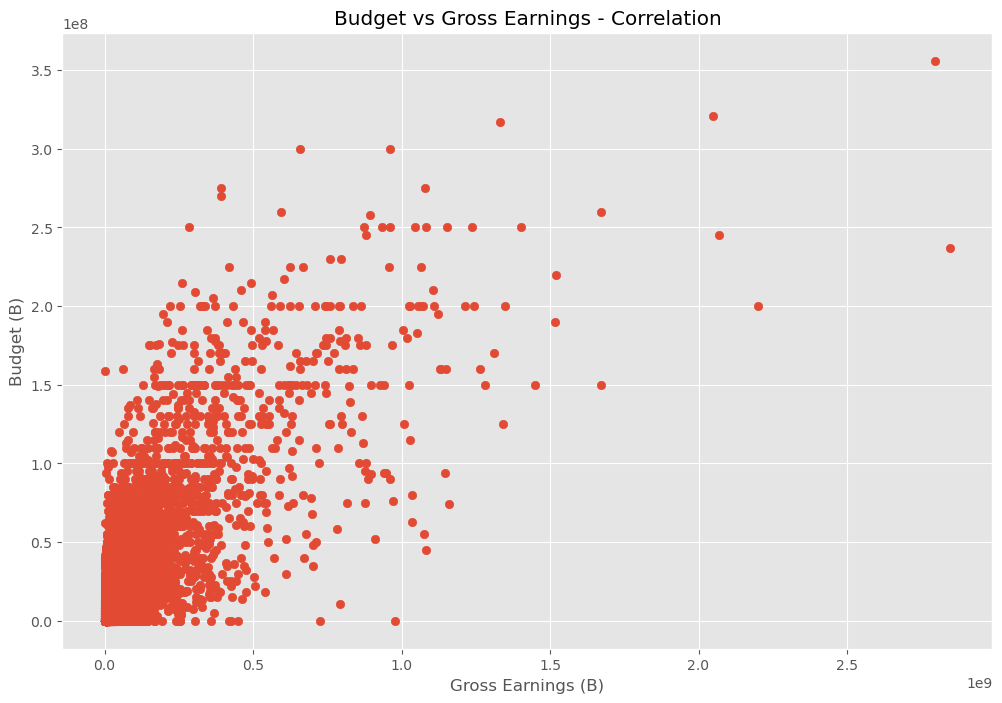

In [322]:
#budget vs gross scatter plot
plt.scatter(x=df['gross'],y=df['budget'])
plt.title("Budget vs Gross Earnings - Correlation")
plt.xlabel("Gross Earnings (B)")
plt.ylabel("Budget (B)")
plt.show()

[Text(0.5, 1.0, 'Budget vs Gross Earnings - Correlation')]

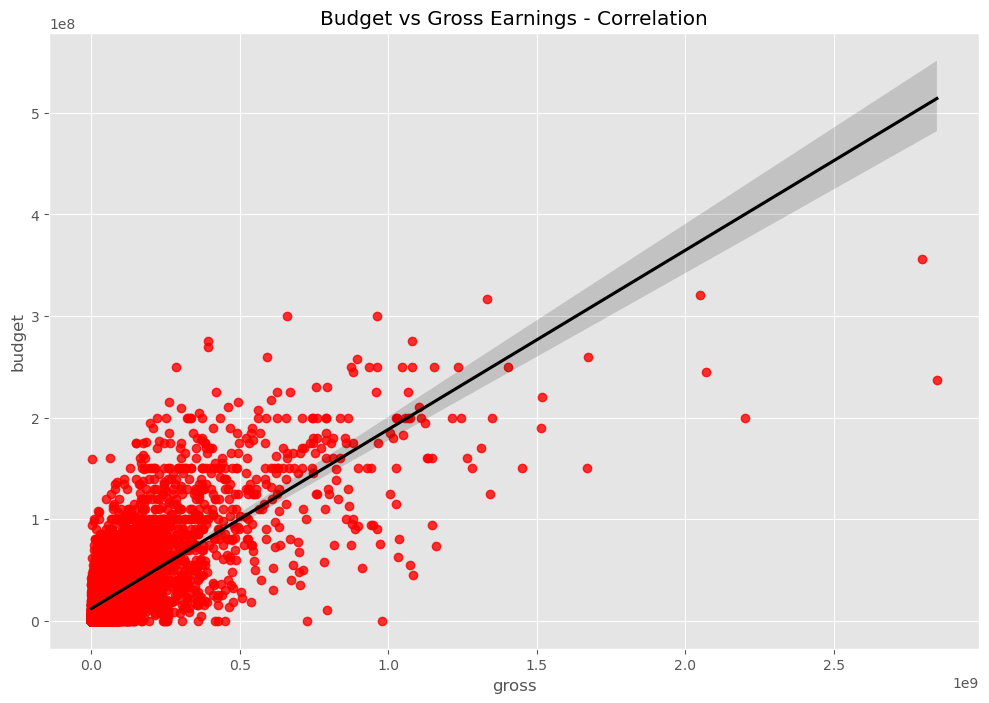

In [323]:
#budget vs gross regresssion analysis
sns.regplot(x='gross',y='budget', data=df, scatter_kws = {'color':'red'}, line_kws = {'color':'black'}).set(title = "Budget vs Gross Earnings - Correlation")


In [324]:
# Correlation

correlation_matrix = df.corr(method='pearson',
    numeric_only= True,
)
correlation_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.098171,0.222952,0.309407,0.262038,0.120811
score,0.098171,1.000000,0.409221,0.055549,0.186323,0.399451
votes,0.222952,0.409221,1.000000,0.486901,0.632860,0.309212
budget,0.309407,0.055549,0.486901,1.000000,0.750141,0.269510
gross,0.262038,0.186323,0.632860,0.750141,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

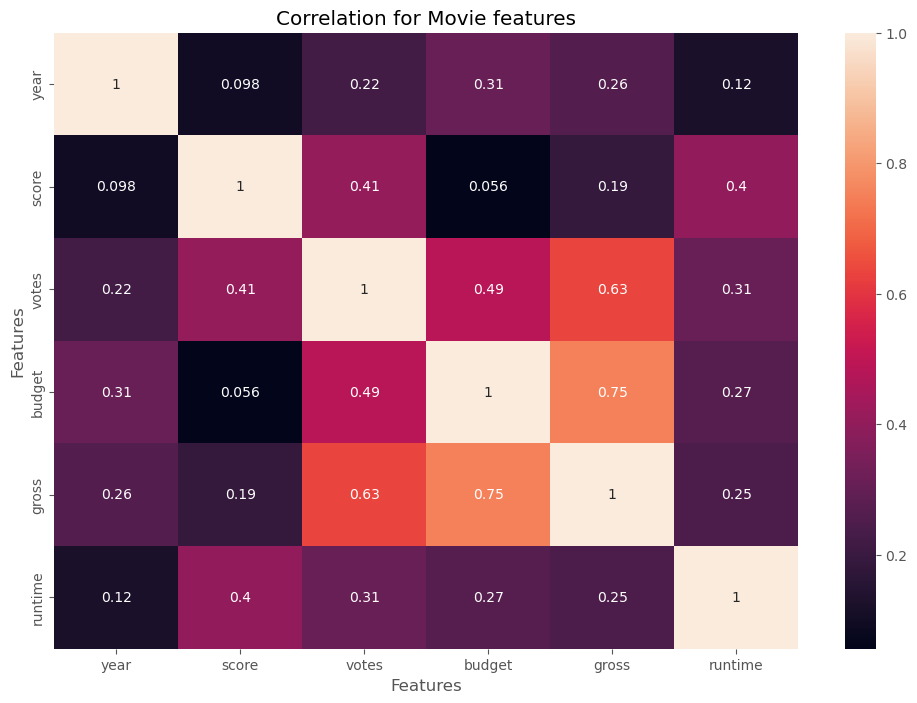

In [325]:
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation for Movie features")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show

In [326]:
# get the correlation for the entire dataset columns
df_numeric = df
for column_df in df_numeric.columns:
    if(df_numeric[column_df].dtype == 'object'):
        df_numeric[column_df] = df_numeric[column_df].astype('category')
        df_numeric[column_df] = df_numeric[column_df].cat.codes
df_numeric

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
0,6586,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,0
1,5572,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,0
2,5141,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000,0,-1,90.0,40
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,0,0,539,90.0,40
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750,0,941,NaN,40
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000,0,-1,120.0,40


In [327]:
# Correlation of all columns

correlation_matrix_all = df_numeric.corr(method='pearson',
    numeric_only= True,
)
correlation_matrix_all

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
name,1.000000,-0.008233,0.016173,0.011245,-0.010901,0.017260,0.013068,0.009111,0.009334,0.006649,-0.009955,0.020710,0.007101,0.009702,0.010391,0.010697
rating,-0.008233,1.000000,0.072315,0.008631,0.016917,-0.001191,0.033216,0.019493,-0.005849,0.013404,0.081942,-0.081834,-0.095377,-0.032616,0.062145,0.006741
genre,0.016173,0.072315,1.000000,-0.081426,0.030138,0.028089,-0.145329,-0.015242,0.006699,-0.005415,-0.037085,-0.333945,-0.234237,-0.070755,-0.052711,-0.077911
year,0.011245,0.008631,-0.081426,1.000000,-0.000311,0.098171,0.222952,-0.020785,-0.008563,-0.027259,-0.070300,0.309407,0.262038,-0.009988,0.120811,0.997415
released,-0.010901,0.016917,0.030138,-0.000311,1.000000,0.042489,0.016132,-0.001503,-0.002594,0.015801,-0.021952,0.008854,0.000310,-0.011378,0.000868,-0.004644
score,0.017260,-0.001191,0.028089,0.098171,0.042489,1.000000,0.409221,0.009554,0.019374,-0.001564,-0.134168,0.055549,0.186323,0.000658,0.399451,0.105994
votes,0.013068,0.033216,-0.145329,0.222952,0.016132,0.409221,1.000000,0.000262,0.000909,-0.019275,0.073786,0.486901,0.632860,0.133307,0.309212,0.218429
director,0.009111,0.019493,-0.015242,-0.020785,-0.001503,0.009554,0.000262,1.000000,0.299076,0.039187,0.017469,0.004968,-0.014923,0.004379,0.017624,-0.020422
writer,0.009334,-0.005849,0.006699,-0.008563,-0.002594,0.019374,0.000909,0.299076,1.000000,0.026812,0.015000,-0.025991,-0.023054,0.005429,-0.003511,-0.008611
star,0.006649,0.013404,-0.005415,-0.027259,0.015801,-0.001564,-0.019275,0.039187,0.026812,1.000000,-0.012993,-0.019954,-0.001126,0.012469,0.010174,-0.027611


<function matplotlib.pyplot.show(close=None, block=None)>

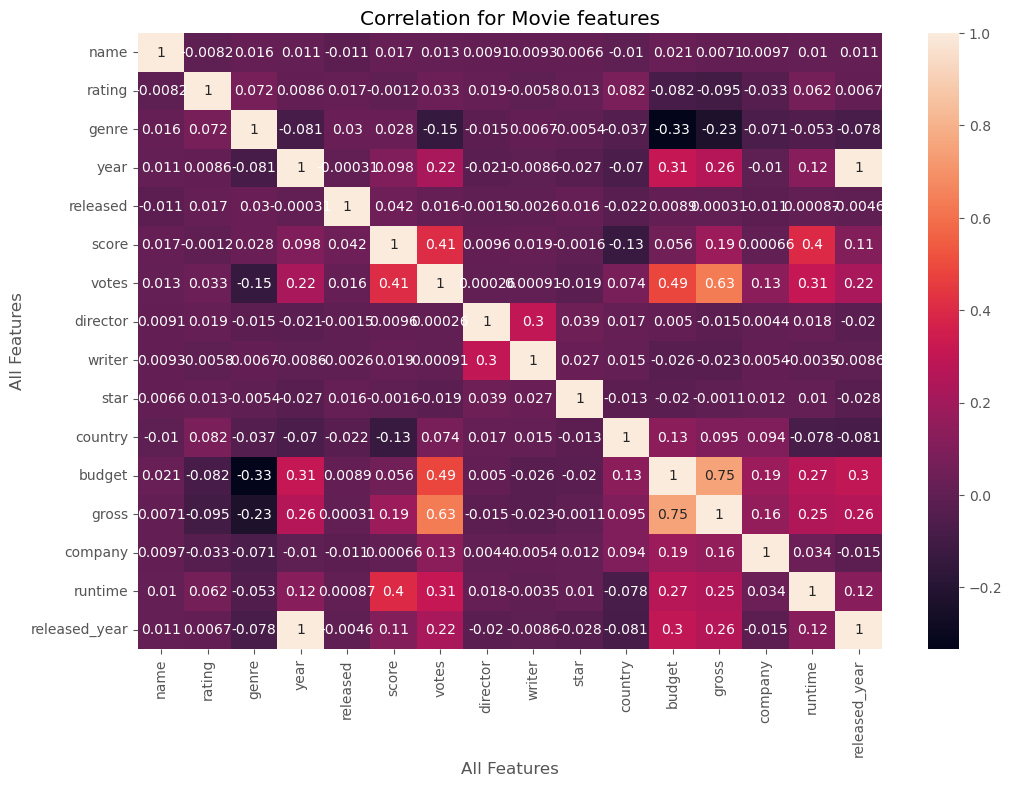

In [328]:
sns.heatmap(correlation_matrix_all, annot=True)
plt.title("Correlation for Movie features")
plt.xlabel("All Features")
plt.ylabel("All Features")
plt.show

In [329]:
#Correlation Summary
correlation_mat = df_numeric.corr()
correlation_pairs = correlation_mat.unstack()
sorted_pairs= correlation_pairs.sort_values()
sorted_pairs[(sorted_pairs)>0.5]

votes          gross            0.632860
gross          votes            0.632860
budget         gross            0.750141
gross          budget           0.750141
released_year  year             0.997415
year           released_year    0.997415
name           name             1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
star           star             1.000000
writer         writer           1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
released       released         1.000000
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
runtime        runtime          1.000000
released_year  released_year    1.000000
dtype: float64